In [1]:
import os
import pandas as pd

In [2]:
# Directorio principal
path_principal = "./database/fbref"

dataframes = []

# Iterar a través de todos los paises
for pais in os.listdir(path_principal):
    subdirectorio = os.path.join(path_principal, pais)
    
    if os.path.isdir(subdirectorio): 
        for archivo in os.listdir(subdirectorio):
            if archivo.endswith(".csv"):
                ruta_completa = os.path.join(subdirectorio, archivo)
                try:
                    df = pd.read_csv(ruta_completa)
                    dataframes.append(df)
                    print(f"Archivo {archivo} cargado correctamente.")
                except Exception as e:
                    print(f"Error al cargar el archivo {archivo}: {e}")

# Concatenar los dataframes
df = pd.concat(dataframes, ignore_index=True)


Archivo matches-argentina-16-to-17.csv cargado correctamente.
Archivo matches-argentina-17-to-18.csv cargado correctamente.
Archivo matches-argentina-18-to-19.csv cargado correctamente.
Archivo matches-argentina-19-to-20.csv cargado correctamente.
Archivo matches-argentina-21.csv cargado correctamente.
Archivo matches-argentina-22.csv cargado correctamente.
Archivo matches-brasil17.csv cargado correctamente.
Archivo matches-brasil18.csv cargado correctamente.
Archivo matches-brasil19.csv cargado correctamente.
Archivo matches-brasil20.csv cargado correctamente.
Archivo matches-brasil21.csv cargado correctamente.
Archivo matches-brasil22.csv cargado correctamente.
Archivo matches-brasil2223.csv cargado correctamente.
Archivo matches-cl-2016-to-2017.csv cargado correctamente.
Archivo matches-cl-2017-to-2018.csv cargado correctamente.
Archivo matches-cl-2018-to-2019.csv cargado correctamente.
Archivo matches-cl-2019-to-2020.csv cargado correctamente.
Archivo matches-cl-2020-to-2021.csv ca

In [3]:
print(df.shape)

(266596, 28)


In [4]:
print(df.columns)

Index(['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'gf', 'ga', 'opponent', 'poss', 'attendance', 'captain', 'formation',
       'referee', 'match report', 'notes', 'sh', 'sot', 'dist', 'pk', 'pkatt',
       'season', 'team', 'xg', 'xga', 'fk'],
      dtype='object')


In [3]:
cols_to_drop = ['Unnamed: 0', 'match report', 'attendance', 'round', 'result',
                'captain', 'referee', 'notes', 'fk', 'day', 'venue']
df.drop(columns=cols_to_drop, inplace=True)

In [4]:
df.rename(columns={"comp": "competition",  "gf": "goals_scored", "ga": "goals_conceded", "sh": "shots",
                   "poss": "possession", "sh":"shots","sot":"shots_on_target","dist":"shot_distance","pk":"penaltys_made",
                   "pkatt":"penaltys_attempted", "xg" : "expected_goals", "xga":"expected_goals_against"}, inplace=True)

In [7]:
print(df.columns)

Index(['date', 'time', 'competition', 'goals_scored', 'goals_conceded',
       'opponent', 'possession', 'formation', 'shots', 'shots_on_target',
       'shot_distance', 'penaltys_made', 'penaltys_attempted', 'season',
       'team', 'expected_goals', 'expected_goals_against'],
      dtype='object')


In [5]:
df['goals_scored'] = df['goals_scored'].astype(str)
df['goals_conceded'] = df['goals_conceded'].astype(str)

In [6]:
df['penaltys_scored'] = df['goals_scored'].str.extract('\((\d+)\)').fillna(0).astype(int)
df['penaltys_conceded'] = df['goals_conceded'].str.extract('\((\d+)\)').fillna(0).astype(int)

In [7]:
float_indices_scored = df[df['goals_scored'].astype(str).str.contains('\.')].index
float_indices_conceded = df[df['goals_conceded'].astype(str).str.contains('\.')].index
all_float_indices = float_indices_scored.union(float_indices_conceded)
df = df.drop(all_float_indices)

In [8]:
df['goals_scored'] = df['goals_scored'].str.split('(').str[0].astype(int)
df['goals_conceded'] = df['goals_conceded'].str.split('(').str[0].astype(int)

In [9]:
df['penalty_shootout'] = ((df['penaltys_scored'] > 0) | (df['penaltys_conceded'] > 0)).astype(int)
print(df['penalty_shootout'].value_counts())


0    250256
1      1519
Name: penalty_shootout, dtype: int64


In [10]:
df.drop(['penaltys_scored', 'penaltys_conceded'], axis=1, inplace=True)

In [11]:
rows_to_remove = df[df['date'].str.contains('2013')]
print(len(rows_to_remove))
print(rows_to_remove)

304
             date time competition  goals_scored  goals_conceded  \
58033  2013-08-09  NaN  Bundesliga             3               1   
58034  2013-08-17  NaN  Bundesliga             1               0   
58035  2013-08-24  NaN  Bundesliga             2               0   
58036  2013-08-27  NaN  Bundesliga             1               1   
58037  2013-09-14  NaN  Bundesliga             2               0   
...           ...  ...         ...           ...             ...   
58623  2013-11-23  NaN  Bundesliga             0               1   
58624  2013-11-30  NaN  Bundesliga             0               2   
58625  2013-12-08  NaN  Bundesliga             0               2   
58626  2013-12-14  NaN  Bundesliga             1               4   
58627  2013-12-21  NaN  Bundesliga             1               0   

             opponent  possession formation  shots  shots_on_target  \
58033      M'Gladbach         NaN   4-1-4-1    NaN              NaN   
58034  Eint Frankfurt         NaN   4

In [58]:
rows_to_remove = df[df['date'].str.contains('2014')]
print(len(rows_to_remove))
print(rows_to_remove)

994
             date   time     competition  goals_scored  goals_conceded  \
27785  2014-08-18  20:00  Premier League             3               1   
27786  2014-08-23  15:00  Premier League             2               0   
27787  2014-08-30  17:30  Premier League             6               3   
27788  2014-09-13  15:00  Premier League             4               2   
27789  2014-09-21  16:00  Premier League             1               1   
...           ...    ...             ...           ...             ...   
58640  2014-04-12    NaN      Bundesliga             0               2   
58641  2014-04-19    NaN      Bundesliga             0               2   
58642  2014-04-26    NaN      Bundesliga             0               2   
58643  2014-05-03    NaN      Bundesliga             0               1   
58644  2014-05-10    NaN      Bundesliga             1               3   

              opponent  possession   formation  shots  shots_on_target  \
27785          Burnley        61.

In [59]:
rows_to_remove = df[df['date'].str.contains('2015')]
print(len(rows_to_remove))
print(rows_to_remove)

13692
              date   time  competition  goals_scored  goals_conceded  \
2140    2015-02-15  18:15  Primera Div             3               1   
2141    2015-02-22  21:30  Primera Div             2               0   
2142    2015-03-01  18:15  Primera Div             1               0   
2143    2015-03-08  21:30  Primera Div             1               1   
2144    2015-03-14  18:15  Primera Div             2               1   
...            ...    ...          ...           ...             ...   
226799  2015-10-07  19:00          MLS             0               0   
226800  2015-10-14  20:00          MLS             0               2   
226801  2015-10-25  16:00          MLS             3               0   
226802  2015-11-01  14:00          MLS             0               0   
226803  2015-11-08  19:00          MLS             0               2   

                opponent  possession formation  shots  shots_on_target  \
2140         Club Olimpo         NaN       NaN    NaN  

In [12]:
df = df[~df['date'].str.contains('2013')]

In [13]:
df = df[~df['date'].str.contains('2014')]

In [14]:
df = df[~df['date'].str.contains('2015')]

In [15]:
df = df[~df['date'].str.contains('2016')]

In [16]:
df['datetime'] = df['date'] + ' ' + df['time']
# Convertir 'datetime' a 'timestamp'
df['datetime'] = pd.to_datetime(df['datetime'], infer_datetime_format=True)
df.drop(columns=['date', 'time'], inplace=True)

In [17]:
cols = ['datetime'] + [col for col in df if col != 'datetime']
df = df[cols]

In [18]:
delete_competitions = ['Champions Lg', 'Europa Lg', 'Libertadores', 'Liga MX']
df = df[~df['competition'].isin(delete_competitions)]

In [19]:
competition_map = {
    'Primera Div': 'Liga Profesional Argentina',
    'Série A': 'Brazilian Serie A',
    'Premier League': 'Premier League',
    'Ligue 1': 'Ligue 1',
    'Bundesliga': 'Bundesliga',
    'Serie A': 'Serie A',
    'La Liga': 'La Liga',
    'MLS': 'US Major League Soccer'
}

df['competition'] = df['competition'].map(competition_map)


In [24]:
unique_competitions = df['competition'].unique()
print(unique_competitions)

['Liga Profesional Argentina' 'Brazilian Serie A' 'Premier League'
 'Ligue 1' 'Bundesliga' 'Serie A' 'La Liga' 'US Major League Soccer']


In [20]:
import unicodedata

def remover_tildes(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

# Aplicar la función a los nombres de equipos en ambos DataFrames
df['team'] = df['team'].apply(remover_tildes)
df['opponent'] = df['opponent'].apply(remover_tildes)


In [22]:
mapeo_equipos = {
    "Estudiantes": "Estudiantes de La Plata",
    "Chacarita" : "Chacarita Juniors",
    "Newell's OB" : "Newell's Old Boys",
    "Newells OB": "Newell's Old Boys",
    "Club Olimpo" : "Olimpo",
    "San Martin" : "San Martin de Tucuman",
    "Defensa y Just": "Defensa y Justicia",
    "Colon": "Colon Santa Fe",
    "Rosario Cent": "Rosario Central",
    "Gimnasia ELP": "Gimnasia La Plata",
    "Godoy Cruz": "Godoy Cruz",
    "Talleres": "Talleres de Cordoba",
    "Velez Sarsf": "Velez Sarsfield",
    "Tucuman": "Atletico Tucuman",
    "CA Huracan": "Huracan",
    "Arsenal": "Arsenal de Sarandi",
    "Argentinos Jun": "Argentinos Juniors",
    "CC Cordoba": "Central Cordoba (Santiago del Estero)",
    "CA Union": "Union Santa Fe",
    "Ath Paranaense" : "Athletico Paranaense",
    "Atl Goianiense" : "Atletico Goianiense",
    "Botafogo (RJ)": "Botafogo",
    "Fortaleza": "Fortaleza EC",
    "Bragantino": "Red Bull Bragantino",
    "America MG": "America Mineiro",
    "America (MG)" : "America Mineiro",
    "Sport Recife" : "Sport",
    "Paris S-G" : "Paris Saint-Germain",
    "Paris Saint Germain": "Paris Saint-Germain",
    "Saint-Etienne" : "St Etienne",
    "Clermont Foot": "Clermont",
    "Arminia" : "Arminia Bielefeld",
    "Bayern Munich": "FC Bayern Munchen",
    "Dortmund": "Borussia Dortmund",
    "Hoffenheim": "TSG Hoffenheim",
    "Koln": "1. FC Koln",
    "Freiburg": "SC Freiburg",
    "Werder Bremen": "SV Werder Bremen",
    "Monchengladbach": "Borussia Monchengladbach",
    "M'Gladbach" : "Borussia Monchengladbach",
    "Schalke 04": "FC Schalke 04",
    "Leverkusen" : "Bayer 04 Leverkusen",
    "Bayer Leverkusen": "Bayer 04 Leverkusen",
    "Augsburg": "FC Augsburg",
    "Mainz 05": "1. FSV Mainz 05",
    "Wolfsburg": "VfL Wolfsburg",
    "Stuttgart": "VfB Stuttgart",
    "Union Berlin": "1. FC Union Berlin",
    "Bochum": "VfL Bochum 1848",
    "Nurnberg" : "1. FC Nurnberg",
    "Dusseldorf" : "Fortuna Dusseldorf",
    "Eint Frankfurt" : "Eintracht Frankfurt",
    "Greuther Furth" : "SpVgg Greuther Furth",
    "Paderborn 07" : "SC Paderborn 07",
    "Hellas Verona": "Verona",
    "Atletico Madrid": "Atletico de Madrid",
    "Valencia": "Valencia CF",
    "Betis" : "Real Betis",
    "Celta Vigo": "Celta de Vigo",
    "Granada": "Granada CF",
    "Valladolid": "Real Valladolid",
    "Inter Miami": "Inter Miami CF",
    "Orlando City": "Orlando City SC",
    "Atlanta United": "Atlanta United FC",
    "Chicago Fire": "Chicago Fire FC",
    "DC United": "D.C. United",
    "Los Angeles FC": "Los Angeles Football Club",
    "Minnesota United": "Minnesota United FC",
    "Sporting KC": "Sporting Kansas City",
    "Houston Dynamo": "Houston Dynamo FC",
    "Montreal Impact": "CF Montreal",
    "Brighton" : "Brighton and Hove Albion",
    "Huddersfield" : "Huddersfield Town",
    "Nott'ham Forest" : "Nottingham Forest",
    "Tottenham" : "Tottenham Hotspur",
    "West Brom" : "West Bromwich Albion",
    "West Ham" : "West Ham United",
    "Wolves" : "Wolverhampton Wanderers",
    "Newcastle Utd" : "Newcastle United",
    "Sheffield Utd" : "Sheffield United",
    "Inter" : "Internazionale",
    "Atlanta Utd" : "Atlanta United",
    "Charlotte" : "Charlotte FC",
    "Dynamo FC" : "Houston Dynamo FC",
    "Dynamo" : "Houston Dynamo FC",
    "Minnesota Utd" : "Minnesota United FC",
    "NYCFC" : "New York City FC",
    "Nashville" : "Nashville SC", 
    "New England" : "New England Revolution",
    "NY Red Bulls" : "New York Red Bulls",
    "San Jose" : "San Jose Earthquakes",
    "Seattle" : "Seattle Sounders FC",
    "Vancouver" : "Vancouver Whitecaps FC",
    "Austin" : "Austin FC",
    "Philadelphia" : "Philadelphia Union",
    "San Martin SJ" : "San Martin de San Juan"

}

df['team'] = df['team'].map(mapeo_equipos).fillna(df['team'])
df['opponent'] = df['opponent'].map(mapeo_equipos).fillna(df['opponent'])

In [23]:
condition_premier = (df['competition'] == 'Premier League')

df.loc[condition_premier & (df['team'] == 'Arsenal de Sarandi'), 'team'] = 'Arsenal'
df.loc[condition_premier & (df['opponent'] == 'Arsenal de Sarandi'), 'opponent'] = 'Arsenal'

In [29]:
print(df.shape)

(190418, 17)


In [24]:
def fix_encoding(s):
    try:
        s = s.encode('latin1').decode('utf-8')
    except:
        pass
    return s

df['team'] = df['team'].apply(fix_encoding)
df['opponent'] = df['opponent'].apply(fix_encoding)


In [31]:
unique_formations = df['formation'].unique()
print(unique_formations)

['4-3-3' '4-3-1-2' '4-1-4-1' '4-2-3-1' '4-1-3-2' '4-2-2-2' '4-4-2' '4-5-1'
 '5-3-2' '4-4-1-1' '5-4-1' '4-3-2-1' '3-4-1-2' '3-5-1-1' '3-3-3-1' '3-5-2'
 '4-1-2-1-2◆' '3-4-3' '4-2-4-0' '3-1-4-2' '3-4-3◆' '3-2-4-1']


In [25]:
def transform_formation(formation):
    # Eliminar símbolo y reemplazar guiones '-'
    formation = formation.replace('◆', '').replace('-', '')

    if formation in ['4222', '4240', '442']:
        return '442'
    elif formation in ['3412', '3331', '3142', '352']:
        return '352'
    elif formation in ['3241', '343']:
        return '343'
    elif formation in ['4411', '4231']:
        return '4231'
    elif formation in ['4132', '41212']:
        return '41212'
    else:
        return formation

df['formation'] = df['formation'].apply(transform_formation).dropna()

In [26]:
df['formation'] = df['formation'].dropna()

In [27]:
formations = df['formation'].value_counts()
print(formations)

4231     75371
433      30338
442      18190
343      17901
352      17799
4141      8913
4312      5390
532       5307
41212     5218
541       2284
4321      2051
451        860
3511       796
Name: formation, dtype: int64


In [66]:
print(df.columns)

Index(['datetime', 'competition', 'goals_scored', 'goals_conceded', 'opponent',
       'possession', 'formation', 'shots', 'shots_on_target', 'shot_distance',
       'penaltys_made', 'penaltys_attempted', 'season', 'team',
       'expected_goals', 'expected_goals_against', 'penalty_shootout'],
      dtype='object')


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df.describe()

,goals_scored,goals_conceded,possession,shots,shots_on_target,shot_distance,penaltys_made,penaltys_attempted,season,expected_goals,expected_goals_against,penalty_shootout
count,190418.000000,190418.000000,190413.000000,190418.000000,190418.000000,179559.000000,190418.000000,190418.000000,190418.000000,179647.000000,179647.000000,190418.000000
mean,1.444254,1.443892,50.008812,12.736601,4.297572,18.135316,0.123586,0.157364,2019.736559,1.449446,1.449306,0.005877
std,1.229118,1.229076,9.262247,4.983013,2.365760,2.939363,0.347142,0.395888,1.518419,0.785124,0.785082,0.076433
min,0.000000,0.000000,17.000000,0.000000,0.000000,4.300000,0.000000,0.000000,2017.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,44.000000,9.000000,3.000000,16.200000,0.000000,0.000000,2018.000000,0.900000,0.900000,0.000000
50%,1.000000,1.000000,50.000000,12.000000,4.000000,18.000000,0.000000,0.000000,2019.000000,1.300000,1.300000,0.000000
75%,2.000000,2.000000,56.000000,16.000000,6.000000,19.900000,0.000000,0.000000,2021.000000,1.900000,1.900000,0.000000
max,9.000000,9.000000,83.000000,47.000000,20.000000,54.900000,3.000000,3.000000,2023.000000,5.900000,5.900000,1.000000


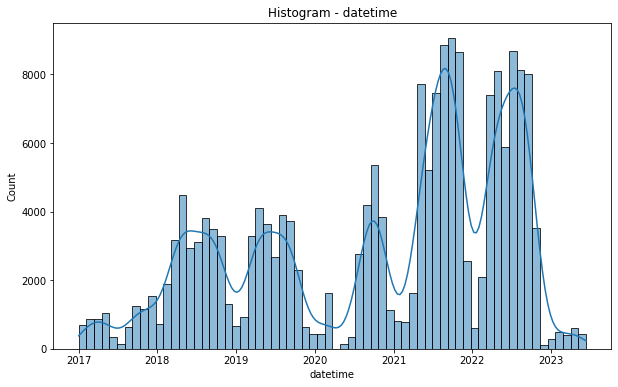

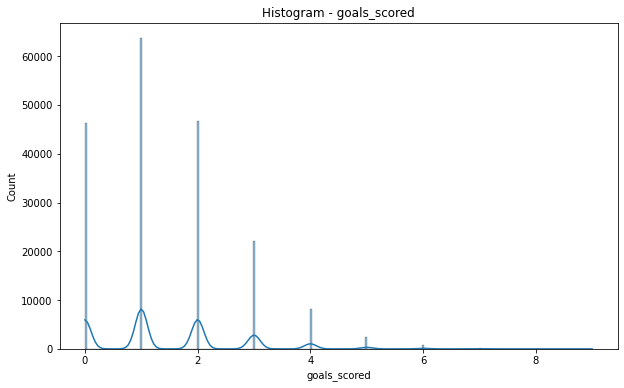

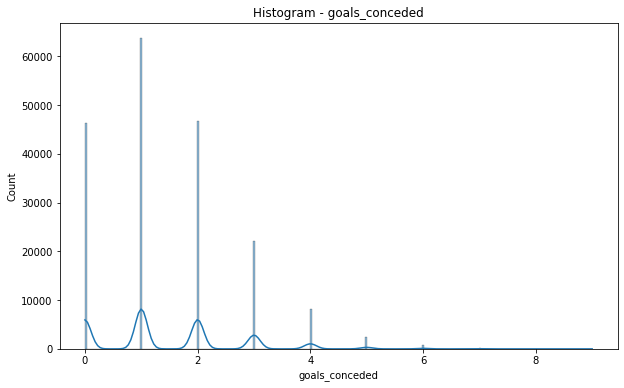

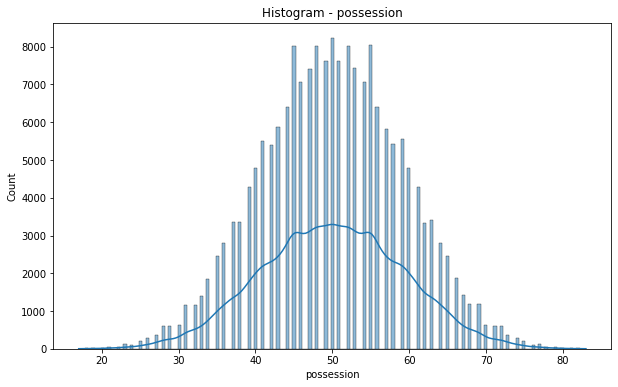

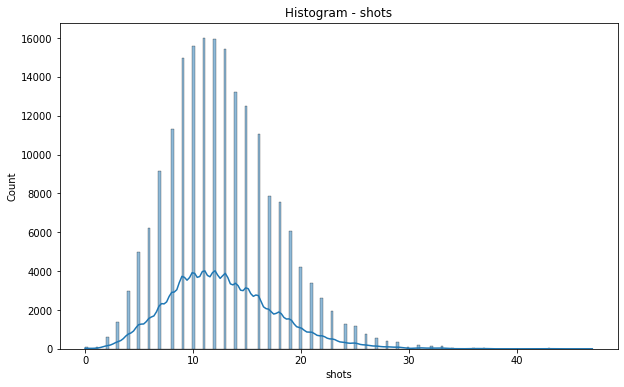

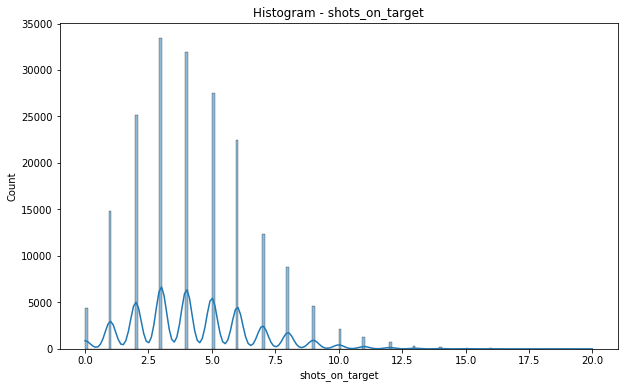

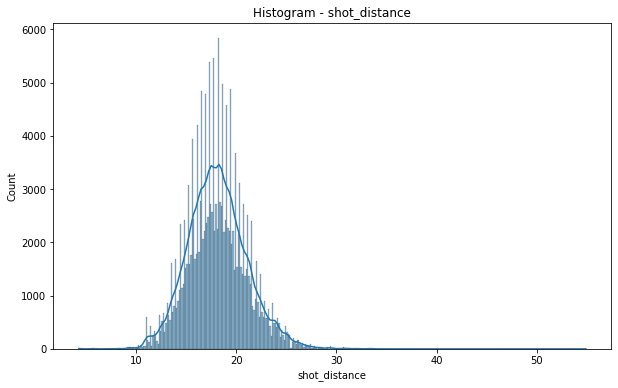

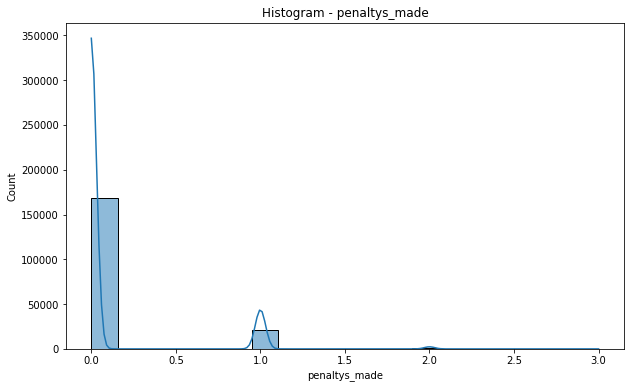

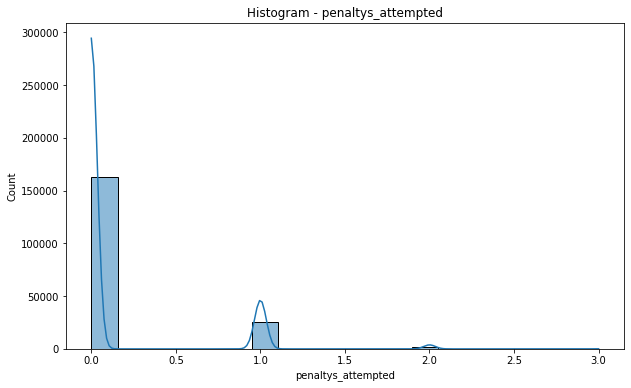

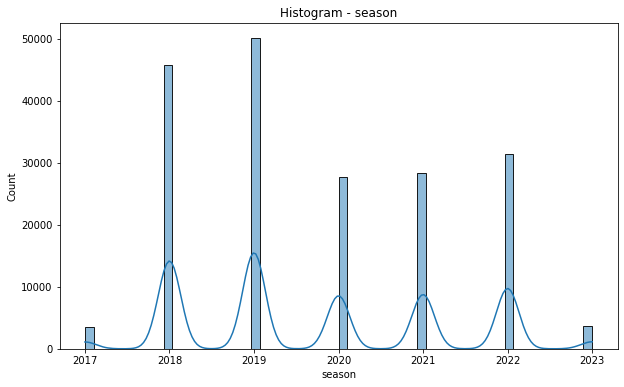

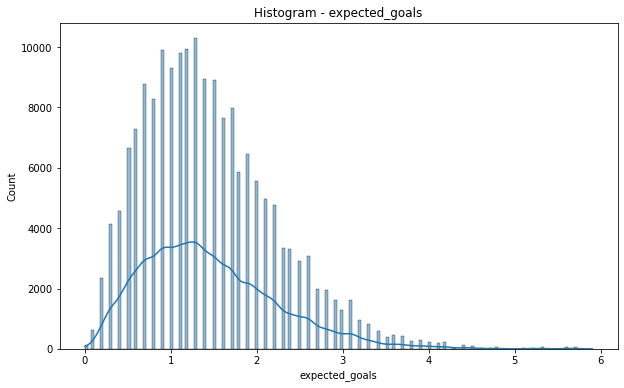

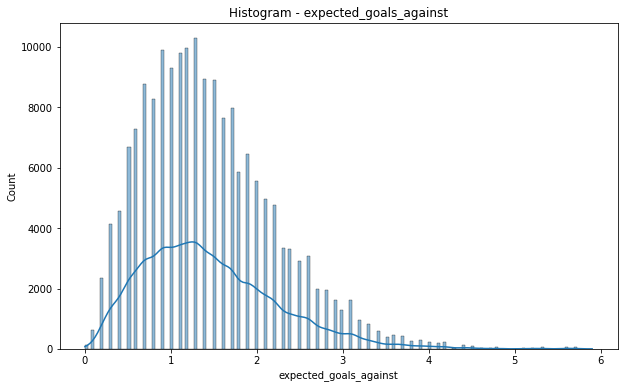

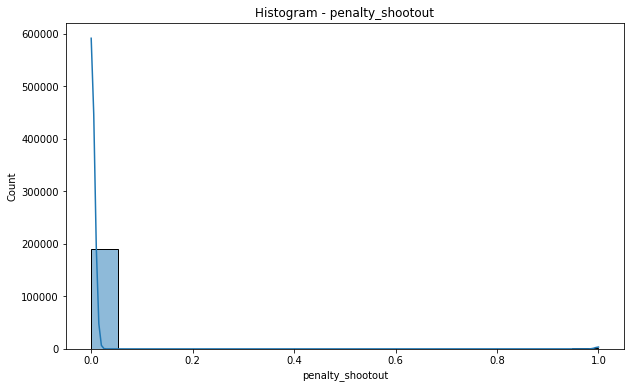

In [38]:
for column in df.columns:
    if df[column].dtype != 'object':
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Histogram - {column}')
        plt.show()

In [33]:
import numpy as np

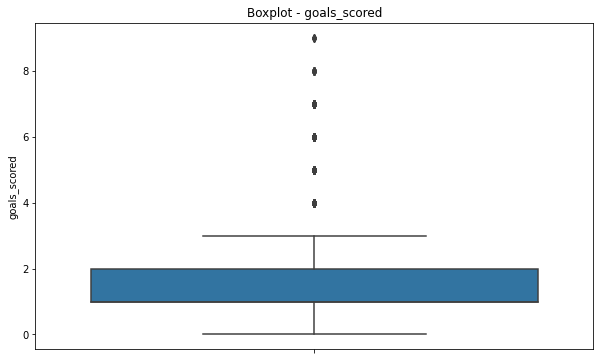

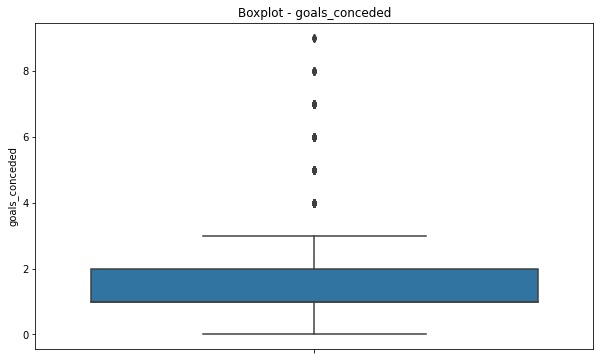

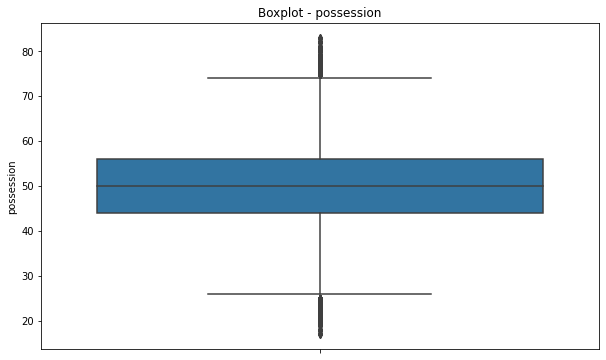

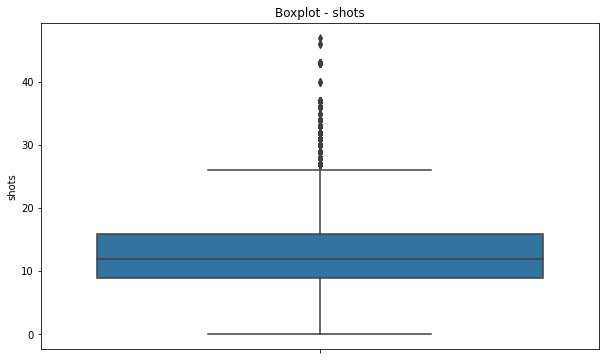

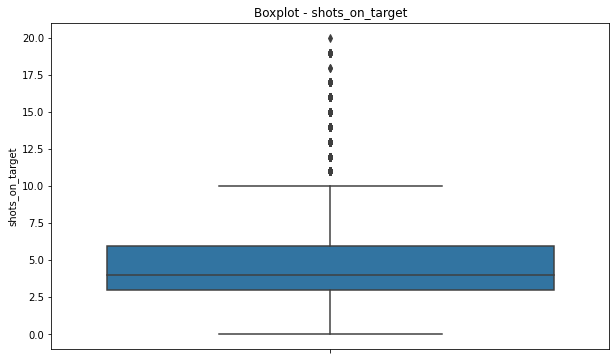

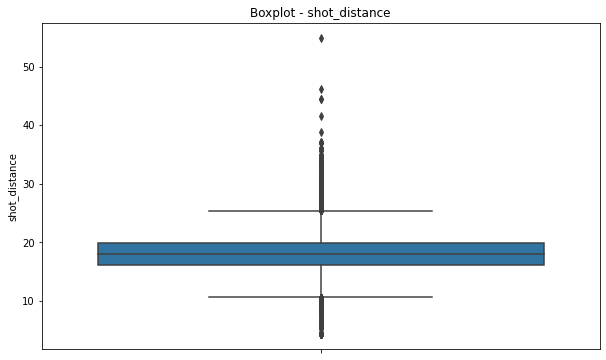

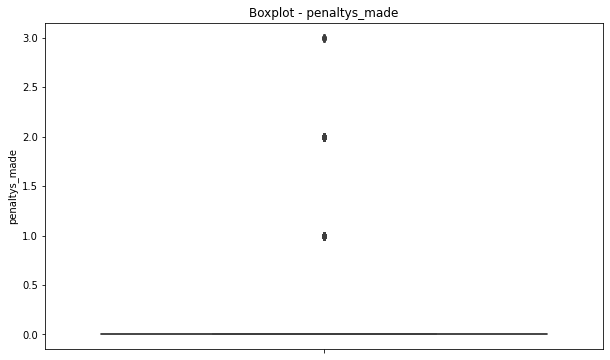

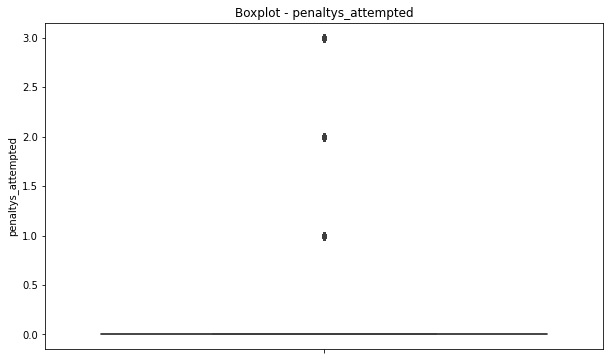

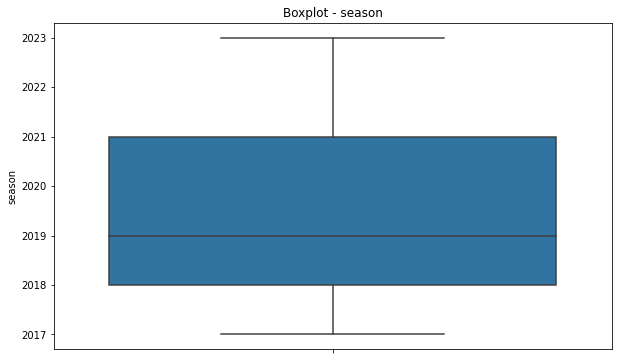

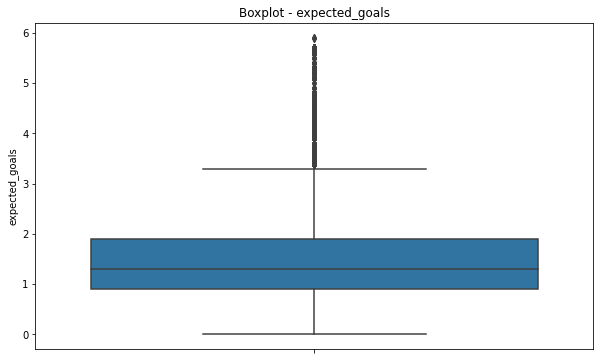

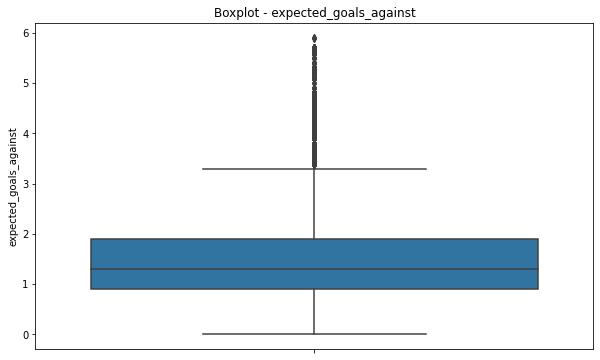

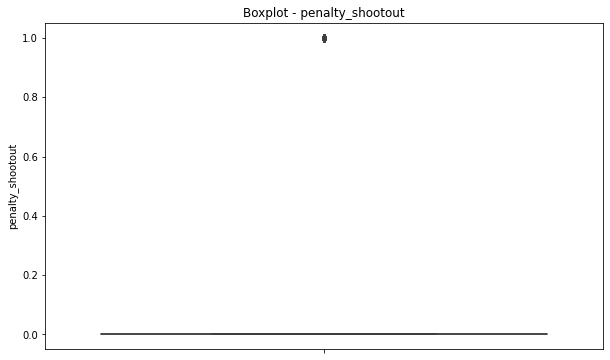

In [34]:
for column in df.columns:
    if np.issubdtype(df[column].dtype, np.number): 
        plt.figure(figsize=(10, 6))
        sns.boxplot(y=df[column])
        plt.title(f'Boxplot - {column}')
        plt.show()

In [36]:
df = df.drop_duplicates(subset=['datetime', 'team', 'opponent'])

In [37]:
print(df.shape)

(33475, 17)


In [70]:
df.to_csv("./final_data/fbref.csv")